In [1]:
import pandas as pd
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
lsd_edgelist = pickle.load(open('./data/lsd_edgelist.pkl', 'rb'))
cocaine_edgelist = pickle.load(open('./data/cocaine_edgelist.pkl', 'rb'))
opiates_edgelist = pickle.load(open('./data/opiates_edgelist.pkl', 'rb'))
benzo_edgelist = pickle.load(open('./data/benzo_edgelist.pkl', 'rb'))

In [24]:
# get centrality metrics
lsd_graph = nx.from_pandas_edgelist(lsd_edgelist, 'source', 'target', edge_attr='weight')
cocaine_graph = nx.from_pandas_edgelist(cocaine_edgelist, 'source', 'target', edge_attr='weight')
opiates_graph = nx.from_pandas_edgelist(opiates_edgelist, 'source', 'target', edge_attr='weight')
benzo_graph = nx.from_pandas_edgelist(benzo_edgelist, 'source', 'target', edge_attr='weight')

average degree:  153.91676528599606
median degree:  103.0


(array([4.259e+03, 5.530e+02, 1.470e+02, 5.600e+01, 1.700e+01, 1.200e+01,
        1.100e+01, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.22350e+02, 4.43700e+02, 6.65050e+02, 8.86400e+02,
        1.10775e+03, 1.32910e+03, 1.55045e+03, 1.77180e+03, 1.99315e+03,
        2.21450e+03, 2.43585e+03, 2.65720e+03, 2.87855e+03, 3.09990e+03,
        3.32125e+03, 3.54260e+03, 3.76395e+03, 3.98530e+03, 4.20665e+03,
        4.42800e+03]),
 <BarContainer object of 20 artists>)

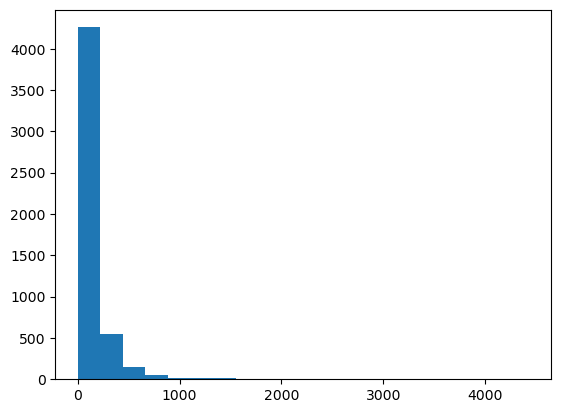

In [20]:
# explore graph - hist degree
lsd_degree = [val for (node, val) in lsd_graph.degree()]
print('average degree: ', np.mean(lsd_degree))
print('median degree: ', np.median(lsd_degree))
plt.hist(lsd_degree, bins=20)

#### Prune graphs

can prune based on average degree or betweeness centrality  
- https://stackoverflow.com/questions/18381187/functions-for-pruning-a-networkx-graph  

Remove nodes with less than average degree would signifcantly reduce the number of nodes in the graph but make it more manageable.

ex. LSD graph: 5070 nodes, 390179 edges
 prune by degree: 1805 nodes, 220710


In [25]:
def prune_graph(graph):
    # prune based on betweeness centrality https://stackoverflow.com/questions/18381187/functions-for-pruning-a-networkx-graph
    # get betweenness centrality
    # betweenness = nx.betweenness_centrality(graph)
    # avg degree
    avg_degree = np.mean([val for (node, val) in graph.degree()])
    print('pre average degree: ', avg_degree)
    rem = []
    # prune
    for n in graph.nodes():
        if graph.degree(n) < avg_degree:
            rem.append(n)
    graph.remove_nodes_from(rem)
    print('post average degree: ', np.mean([val for (node, val) in graph.degree()]))
    return graph

In [26]:
prune_graph(lsd_graph)
prune_graph(cocaine_graph)
prune_graph(opiates_graph)
prune_graph(benzo_graph)

pre average degree:  153.91676528599606
post average degree:  244.5540166204986
pre average degree:  114.95946763460375
post average degree:  216.90459849004804
pre average degree:  112.47497668635374
post average degree:  194.3393574297189
pre average degree:  131.56806998359758
post average degree:  221.24338624338625


In [28]:
print('lsd: ', nx.info(lsd_graph))
print('cocaine: ', nx.info(cocaine_graph))
print('opiates: ', nx.info(opiates_graph))
print('benzo: ', nx.info(benzo_graph))

lsd:  Graph with 1805 nodes and 220710 edges
cocaine:  Graph with 1457 nodes and 158015 edges
opiates:  Graph with 996 nodes and 96781 edges
benzo:  Graph with 1134 nodes and 125445 edges


/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_83034/3709570997.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('lsd: ', nx.info(lsd_graph))
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_83034/3709570997.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('cocaine: ', nx.info(cocaine_graph))
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_83034/3709570997.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('opiates: ', nx.info(opiates_graph))
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_83034/3709570997.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('benzo: ', nx.info(benzo_graph))


In [38]:
# get centrality metrics of graphs - degree, betweenness, closeness, and eigenvector
def get_centrality(G):
    df = pd.DataFrame(columns=['node','degree', 'betweenness', 'closeness', 'eigenvector'])
    degree = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
    df['node'] = degree.keys()
    df['degree'] = degree.values()
    df['betweenness'] = betweenness.values()
    df['closeness'] = closeness.values()
    df['eigenvector'] = eigenvector.values()
    return df

In [39]:
lsd_centrality = get_centrality(lsd_graph)
opiates_cent = get_centrality(opiates_graph)
cocaine_cent = get_centrality(cocaine_graph)
benzo_cent = get_centrality(benzo_graph)

In [58]:
# average shortest path length
print('lsd: ', nx.average_shortest_path_length(lsd_graph))
print('cocaine: ', nx.average_shortest_path_length(cocaine_graph))
print('opiates: ', nx.average_shortest_path_length(opiates_graph))
print('benzo: ', nx.average_shortest_path_length(benzo_graph))

lsd:  1.8644790585402706
cocaine:  1.8510270614766153
opiates:  1.8047042441121268
benzo:  1.8047278144365524


Small world networks have two primary characteristics: a short average shortest path length and high clustering. our networks have a high clustering coefficient and a short average shortest path length. this means that the networks are small world networks.

### Community detection



In [41]:
import community

def get_communities(G, df):
    partition = community.best_partition(G)
    print("number of communities: ", len(set(partition.values())))
    # add to G
    nx.set_node_attributes(G, partition, "community")
    # add partition to df
    # df["community"] = df["index"].map(partition)
    df["community"] = df["node"].map(partition)
    return df, G


In [42]:
# get communities
lsd_centrality, lsd_graph = get_communities(lsd_graph, lsd_centrality)

number of communities:  9


In [43]:
opiates_cent, opiates_graph = get_communities(opiates_graph, opiates_cent)
cocaine_cent, cocaine_graph = get_communities(cocaine_graph, cocaine_cent)
benzo_cent, benzo_graph = get_communities(benzo_graph, benzo_cent)

number of communities:  7
number of communities:  7
number of communities:  7


In [73]:
import json
# export just nodes as JSON- for topic modeling later
# nodes as list
lsd_nodes = list(lsd_graph.nodes())
json.dump(lsd_nodes, open('./data/lsd_nodes.json', 'w'))
opiate_nodes = list(opiates_graph.nodes())
json.dump(opiate_nodes, open('./data/opiate_nodes.json', 'w'))
cocaine_nodes = list(cocaine_graph.nodes())
json.dump(cocaine_nodes, open('./data/cocaine_nodes.json', 'w'))
benzo_nodes = list(benzo_graph.nodes())
json.dump(benzo_nodes, open('./data/benzo_nodes.json', 'w'))

In [ ]:

pickle.dump(lsd_centrality, open('./data/lsd_centrality.pkl', 'wb'))
pickle.dump(opiates_cent, open('./data/opiates_centrality.pkl', 'wb'))
pickle.dump(cocaine_cent, open('./data/cocaine_centrality.pkl', 'wb'))
pickle.dump(benzo_cent, open('./data/benzo_centrality.pkl', 'wb'))

---

### Table 3
#### Network statistics
num nodes, num edges, avg degree, avg clustering, num communities, top nodes based on betweeness, closeness, degree, eigenvector centrality


In [53]:
print('benzo: num nodes:',  benzo_graph.number_of_nodes(), 'num edges: ', benzo_graph.number_of_edges(), 'avg degree: ', np.mean([val for (node, val) in benzo_graph.degree()]), '\n',
      'avg clustering: ', nx.average_clustering(benzo_graph), 'num communities: ', len(set(nx.get_node_attributes(benzo_graph, 'community').values())),'\n',
      'top nodes: degree:', sorted(benzo_graph.degree, key=lambda x: x[1], reverse=True)[:6], 'top betweenness: ', sorted(nx.betweenness_centrality(benzo_graph).items(), key=lambda x: x[1], reverse=True)[:6],'\n',
      'top closeness: ', sorted(nx.closeness_centrality(benzo_graph).items(), key=lambda x: x[1], reverse=True)[:6], 'top eigenvector: ', sorted(nx.eigenvector_centrality(benzo_graph).items(), key=lambda x: x[1], reverse=True)[:6])

benzo: num nodes: 1134 num edges:  125445 avg degree:  221.24338624338625 
 avg clustering:  0.7658853300148719 num communities:  7 
 top nodes: degree: [('Drugs', 1126), ('opiates', 1114), ('AskReddit', 1069), ('benzodiazepines', 1017), ('depression', 968), ('weed', 951)] top betweenness:  [('Drugs', 0.031633107451170844), ('opiates', 0.030500400985566774), ('AskReddit', 0.027060951225052855), ('benzodiazepines', 0.02366840473876205), ('depression', 0.020603500792611484), ('weed', 0.019886774120583723)] 
 top closeness:  [('Drugs', 0.993859649122807), ('opiates', 0.9835069444444444), ('AskReddit', 0.9465329991645781), ('benzodiazepines', 0.9071257005604484), ('depression', 0.8728813559322034), ('weed', 0.8615969581749049)] top eigenvector:  [('Drugs', 0.1023371152828478), ('opiates', 0.10193230437781146), ('AskReddit', 0.09994949588321465), ('depression', 0.09421191790402503), ('MDMA', 0.0934608958348686), ('benzodiazepines', 0.09252510145644444)]


In [54]:
print('cocaine: num nodes:',  cocaine_graph.number_of_nodes(), 'num edges: ', cocaine_graph.number_of_edges(), 'avg degree: ', np.mean([val for (node, val) in cocaine_graph.degree()]), '\n',
        'avg clustering: ', nx.average_clustering(cocaine_graph), 'num communities: ', len(set(nx.get_node_attributes(cocaine_graph, 'community').values())),'\n',
        'top nodes: degree:', sorted(cocaine_graph.degree, key=lambda x: x[1], reverse=True)[:6], 'top betweenness: ', sorted(nx.betweenness_centrality(cocaine_graph).items(), key=lambda x: x[1], reverse=True)[:6],'\n',
        'top closeness: ', sorted(nx.closeness_centrality(cocaine_graph).items(), key=lambda x: x[1], reverse=True)[:6], 'top eigenvector: ', sorted(nx.eigenvector_centrality(cocaine_graph).items(), key=lambda x: x[1], reverse=True)[:6])

cocaine: num nodes: 1457 num edges:  158015 avg degree:  216.90459849004804 
 avg clustering:  0.7610082711098733 num communities:  7 
 top nodes: degree: [('Drugs', 1436), ('AskReddit', 1402), ('opiates', 1188), ('cocaine', 1176), ('benzodiazepines', 1110), ('LSD', 1108)] top betweenness:  [('Drugs', 0.039645413889823816), ('AskReddit', 0.03707256249186363), ('cocaine', 0.02448667033531217), ('opiates', 0.022993831275324464), ('LSD', 0.020264569671546682), ('benzodiazepines', 0.019150972073029977)] 
 top closeness:  [('Drugs', 0.986449864498645), ('AskReddit', 0.9642384105960264), ('opiates', 0.8445475638051044), ('cocaine', 0.8387096774193549), ('benzodiazepines', 0.8079911209766926), ('LSD', 0.8070953436807096)] top eigenvector:  [('Drugs', 0.10385508506145531), ('AskReddit', 0.10283991743086114), ('depression', 0.08870518486074956), ('cocaine', 0.08830845148846725), ('opiates', 0.08775104359729381), ('Showerthoughts', 0.08221683192040077)]


In [55]:
print('lsd: num nodes:',  lsd_graph.number_of_nodes(), 'num edges: ', lsd_graph.number_of_edges(), 'avg degree: ', np.mean([val for (node, val) in lsd_graph.degree()]),'\n',
        'avg clustering: ', nx.average_clustering(lsd_graph), 'num communities: ', len(set(nx.get_node_attributes(lsd_graph, 'community').values())),'\n',
        'top nodes: degree:', sorted(lsd_graph.degree, key=lambda x: x[1], reverse=True)[:6], 'top betweenness: ', sorted(nx.betweenness_centrality(lsd_graph).items(), key=lambda x: x[1], reverse=True)[:6],'\n',
        'top closeness: ', sorted(nx.closeness_centrality(lsd_graph).items(), key=lambda x: x[1], reverse=True)[:6], 'top eigenvector: ', sorted(nx.eigenvector_centrality(lsd_graph).items(), key=lambda x: x[1], reverse=True)[:6])

lsd: num nodes: 1805 num edges:  220710 avg degree:  244.5540166204986 
 avg clustering:  0.7694483807393594 num communities:  9 
 top nodes: degree: [('LSD', 1735), ('weed', 1544), ('Psychonaut', 1520), ('shrooms', 1516), ('trees', 1488), ('AskReddit', 1411)] top betweenness:  [('LSD', 0.040736123935012324), ('weed', 0.03004628110106109), ('trees', 0.027290377384291603), ('Psychonaut', 0.026434640920886276), ('shrooms', 0.026321317413387103), ('Psychedelics', 0.0220489493323274)] 
 top closeness:  [('LSD', 0.9631607047517352), ('weed', 0.874031007751938), ('Psychonaut', 0.8639846743295019), ('shrooms', 0.8623326959847036), ('trees', 0.8509433962264151), ('AskReddit', 0.8211197086936732)] top eigenvector:  [('LSD', 0.10711735350196191), ('weed', 0.09902170210488363), ('Psychonaut', 0.09821801500577616), ('shrooms', 0.09726377781779136), ('trees', 0.09713065263581282), ('DMT', 0.09328516127259258)]


In [56]:
print('opiates: num nodes:',  opiates_graph.number_of_nodes(), 'num edges: ', opiates_graph.number_of_edges(), 'avg degree: ', np.mean([val for (node, val) in opiates_graph.degree()]),'\n',
        'avg clustering: ', nx.average_clustering(opiates_graph), 'num communities: ', len(set(nx.get_node_attributes(opiates_graph, 'community').values())), '\n',
        'top nodes: degree:', sorted(opiates_graph.degree, key=lambda x: x[1], reverse=True)[:6], 'top betweenness: ', sorted(nx.betweenness_centrality(opiates_graph).items(), key=lambda x: x[1], reverse=True)[:6], '\n',
        'top closeness: ', sorted(nx.closeness_centrality(opiates_graph).items(), key=lambda x: x[1], reverse=True)[:6], 'top eigenvector: ', sorted(nx.eigenvector_centrality(opiates_graph).items(), key=lambda x: x[1], reverse=True)[:6])

opiates: num nodes: 996 num edges:  96781 avg degree:  194.3393574297189 
 avg clustering:  0.7779958285124204 num communities:  7 
 top nodes: degree: [('AskReddit', 909), ('LSD', 900), ('weed', 876), ('Drugs', 839), ('benzodiazepines', 829), ('opiates', 828)] top betweenness:  [('LSD', 0.029744179844127215), ('AskReddit', 0.02903531442550273), ('weed', 0.02691054683085193), ('Drugs', 0.025380958471896378), ('opiates', 0.02477275895469221), ('benzodiazepines', 0.024463899391280675)] 
 top closeness:  [('AskReddit', 0.9204440333024977), ('LSD', 0.9128440366972477), ('weed', 0.8931777378815081), ('Drugs', 0.8644656820156386), ('benzodiazepines', 0.8570198105081827), ('opiates', 0.8562822719449226)] top eigenvector:  [('AskReddit', 0.09234438207540875), ('weed', 0.0903297585637751), ('LSD', 0.0901134368918837), ('Showerthoughts', 0.08740639371900767), ('AskDocs', 0.08602607290051845), ('NoStupidQuestions', 0.08468974814595065)]


In [48]:
# export to gephi
nx.write_gexf(lsd_graph, './gephi/lsd_graph.gexf')
nx.write_gexf(cocaine_graph, './gephi/cocaine_graph.gexf')
nx.write_gexf(opiates_graph, './gephi/opiates_graph.gexf')
nx.write_gexf(benzo_graph, './gephi/benzo_graph.gexf')